In [148]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [149]:
# data loading

file = "/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv"
df = pd.read_csv(file)
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [150]:
df.shape

(32581, 12)

In [151]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [152]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [153]:
df['loan_status'].unique()

array([1, 0])

In [154]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Method: Impute with median or use a model-based imputation (e.g., KNN imputation, regression model).
Reason: Employment length is a numerical feature. The number of missing values is quite high (895), so imputation with median is a common choice. Alternatively, you could use a machine learning model to predict missing values based on other features if the correlation is strong.

In [155]:
# fillin missing values for person_emp_length
# df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())
df.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [156]:
# df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())

df.head()
df.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [157]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [158]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [159]:
df.shape

(32581, 12)

In [160]:
# 1 → Loan defaulted (High Risk)
# 0 → Loan fully paid (Low Risk)
# # Check unique values in loan_status (Target Variable)
print(df["loan_status"].value_counts())

loan_status
0    25473
1     7108
Name: count, dtype: int64


In [161]:
# drop unwanted feature
# df = df.drop("student_id", axis=1)

In [162]:
# df.head()

In [163]:
# check unique values from person_home_ownership
person_home_ownership = df['person_home_ownership'].unique()
print(person_home_ownership)

['RENT' 'OWN' 'MORTGAGE' 'OTHER']


In [164]:
# One-Hot Encoding for person_home_ownership
df_encoded = pd.get_dummies(df, columns=["person_home_ownership"])
df_encoded.tail()

,person_age,person_income,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
32576,57,53000,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,True,False,False,False
32577,54,120000,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19,True,False,False,False
32578,65,76000,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,False,False,False,True
32579,56,150000,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26,True,False,False,False
32580,66,42000,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30,False,False,False,True


In [165]:
# check unique values from loan_intent
loan_intent = df['loan_intent'].unique()
print(loan_intent)

['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']


In [166]:
# One-Hot Encoding for gender
df_encoded = pd.get_dummies(df_encoded, columns=["loan_intent"])
df_encoded.tail()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
32576,57,53000,1.0,C,5800,13.16,0,0.11,N,30,True,False,False,False,False,False,False,False,True,False
32577,54,120000,4.0,A,17625,7.49,0,0.15,N,19,True,False,False,False,False,False,False,False,True,False
32578,65,76000,3.0,B,35000,10.99,1,0.46,N,28,False,False,False,True,False,False,True,False,False,False
32579,56,150000,5.0,B,15000,11.48,0,0.10,N,26,True,False,False,False,False,False,False,False,True,False
32580,66,42000,2.0,B,6475,9.99,0,0.15,N,30,False,False,False,True,False,False,False,True,False,False


In [167]:
# check unique values from cb_person_default_on_file
cb_person_default_on_file = df['cb_person_default_on_file'].unique()
print(cb_person_default_on_file)

['Y' 'N']


In [168]:
# LABEL ENCODING FOR cb_person_default_on_file
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_encoded['cb_person_default_on_file'] = label_encoder.fit_transform(df_encoded['cb_person_default_on_file'])
# Display the transformed column
print(df_encoded['cb_person_default_on_file'].head())  # Show the first 5 rows of the transformed column
df_encoded.tail()



0    1
1    0
2    0
3    0
4    1
Name: cb_person_default_on_file, dtype: int64


,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
32576,57,53000,1.0,C,5800,13.16,0,0.11,0,30,True,False,False,False,False,False,False,False,True,False
32577,54,120000,4.0,A,17625,7.49,0,0.15,0,19,True,False,False,False,False,False,False,False,True,False
32578,65,76000,3.0,B,35000,10.99,1,0.46,0,28,False,False,False,True,False,False,True,False,False,False
32579,56,150000,5.0,B,15000,11.48,0,0.10,0,26,True,False,False,False,False,False,False,False,True,False
32580,66,42000,2.0,B,6475,9.99,0,0.15,0,30,False,False,False,True,False,False,False,True,False,False


In [169]:
# check unique values from loan_grade
loan_grade = df['loan_grade'].unique()
print(loan_grade)

['D' 'B' 'C' 'A' 'E' 'F' 'G']


In [170]:
# One-Hot Encoding for gender
df_encoded = pd.get_dummies(df_encoded, columns=["loan_grade"])
df_encoded.tail()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
32576,57,53000,1.0,5800,13.16,0,0.11,0,30,True,...,False,True,False,False,False,True,False,False,False,False
32577,54,120000,4.0,17625,7.49,0,0.15,0,19,True,...,False,True,False,True,False,False,False,False,False,False
32578,65,76000,3.0,35000,10.99,1,0.46,0,28,False,...,False,False,False,False,True,False,False,False,False,False
32579,56,150000,5.0,15000,11.48,0,0.10,0,26,True,...,False,True,False,False,True,False,False,False,False,False
32580,66,42000,2.0,6475,9.99,0,0.15,0,30,False,...,True,False,False,False,True,False,False,False,False,False


In [171]:
df_encoded.shape

(32581, 26)

In [172]:
df_encoded.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A',
       'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'loan_grade_F', 'loan_grade_G'],
      dtype='object')

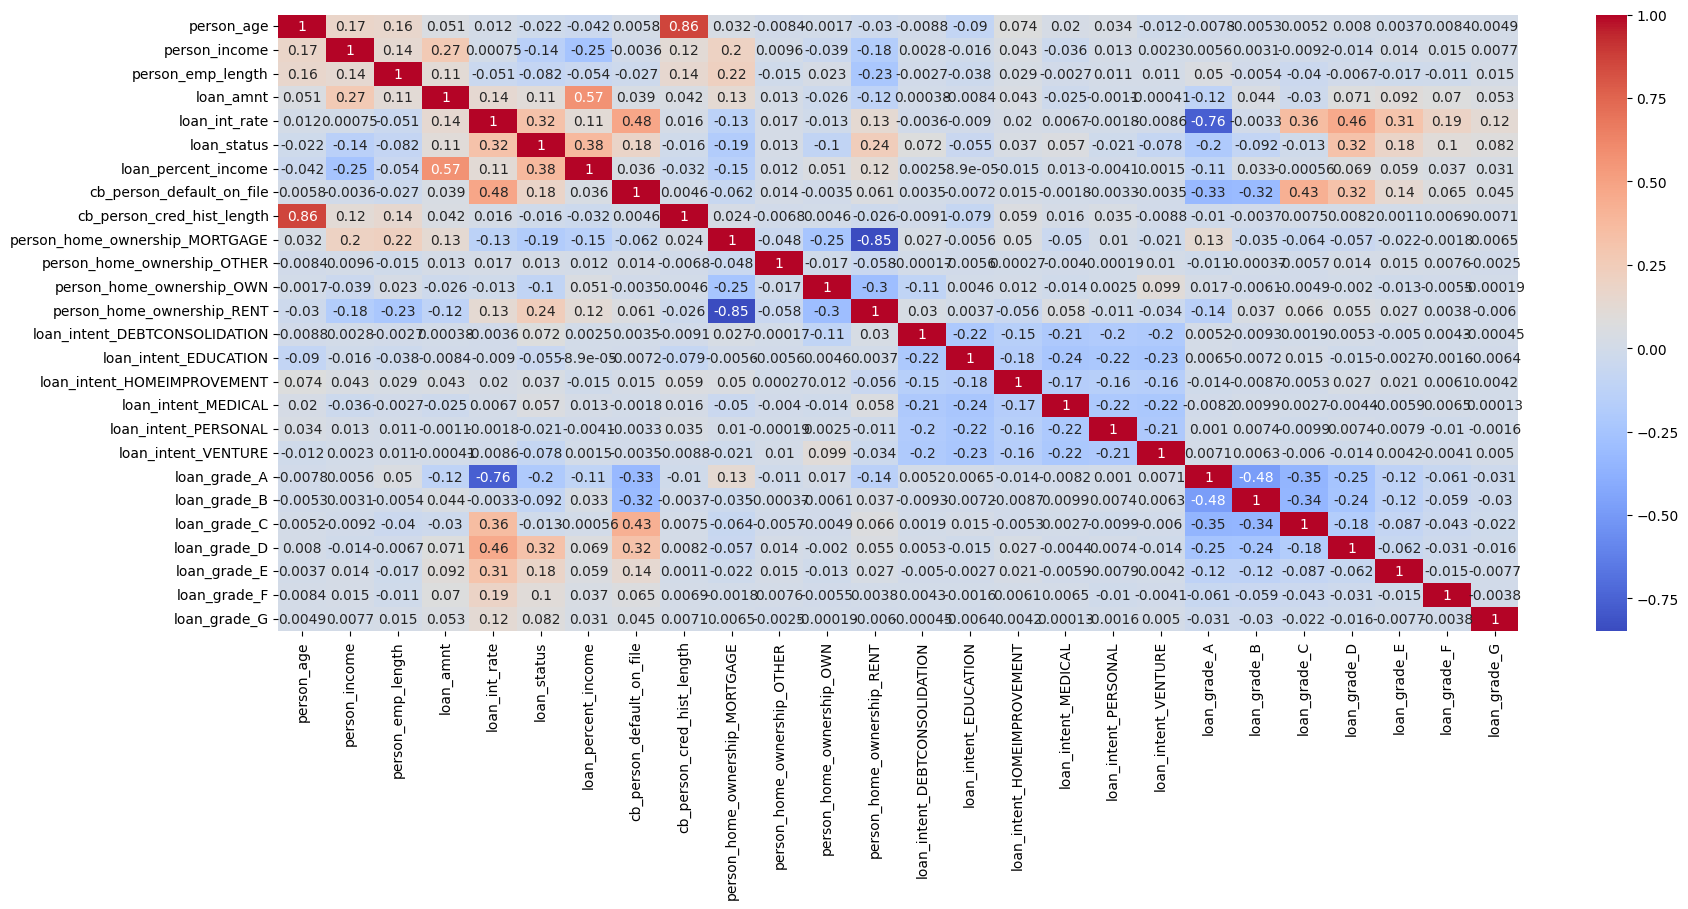

In [173]:
# correlations
# correlation_matrix = df_encoded.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Correlation matrix
correlation_matrix = df_encoded.corr()

# Set figure size
plt.figure(figsize=(20, 8))  # Increase the width and height (adjust as needed)

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()


In [174]:
# List of columns to drop
columns_to_drop = [
    "cb_person_cred_hist_length",  # Highly correlated with person_age
    "loan_int_rate",               # Highly correlated with loan_amnt
    # "person_home_ownership_OTHER", # Low impact
    # "loan_intent_VENTURE",         # Low impact
    "person_home_ownership_MORTGAGE"  # Strong correlation with RENT and OWN (keep only one)
]

# Drop the columns
df_encoded = df_encoded.drop(columns=columns_to_drop, axis=1)

# Display the updated DataFrame
df_encoded.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,22,59000,123.0,35000,1,0.59,1,False,False,True,...,False,True,False,False,False,False,True,False,False,False
1,21,9600,5.0,1000,0,0.10,0,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,25,9600,1.0,5500,1,0.57,0,False,False,False,...,True,False,False,False,False,True,False,False,False,False
3,23,65500,4.0,35000,1,0.53,0,False,False,True,...,True,False,False,False,False,True,False,False,False,False
4,24,54400,8.0,35000,1,0.55,1,False,False,True,...,True,False,False,False,False,True,False,False,False,False


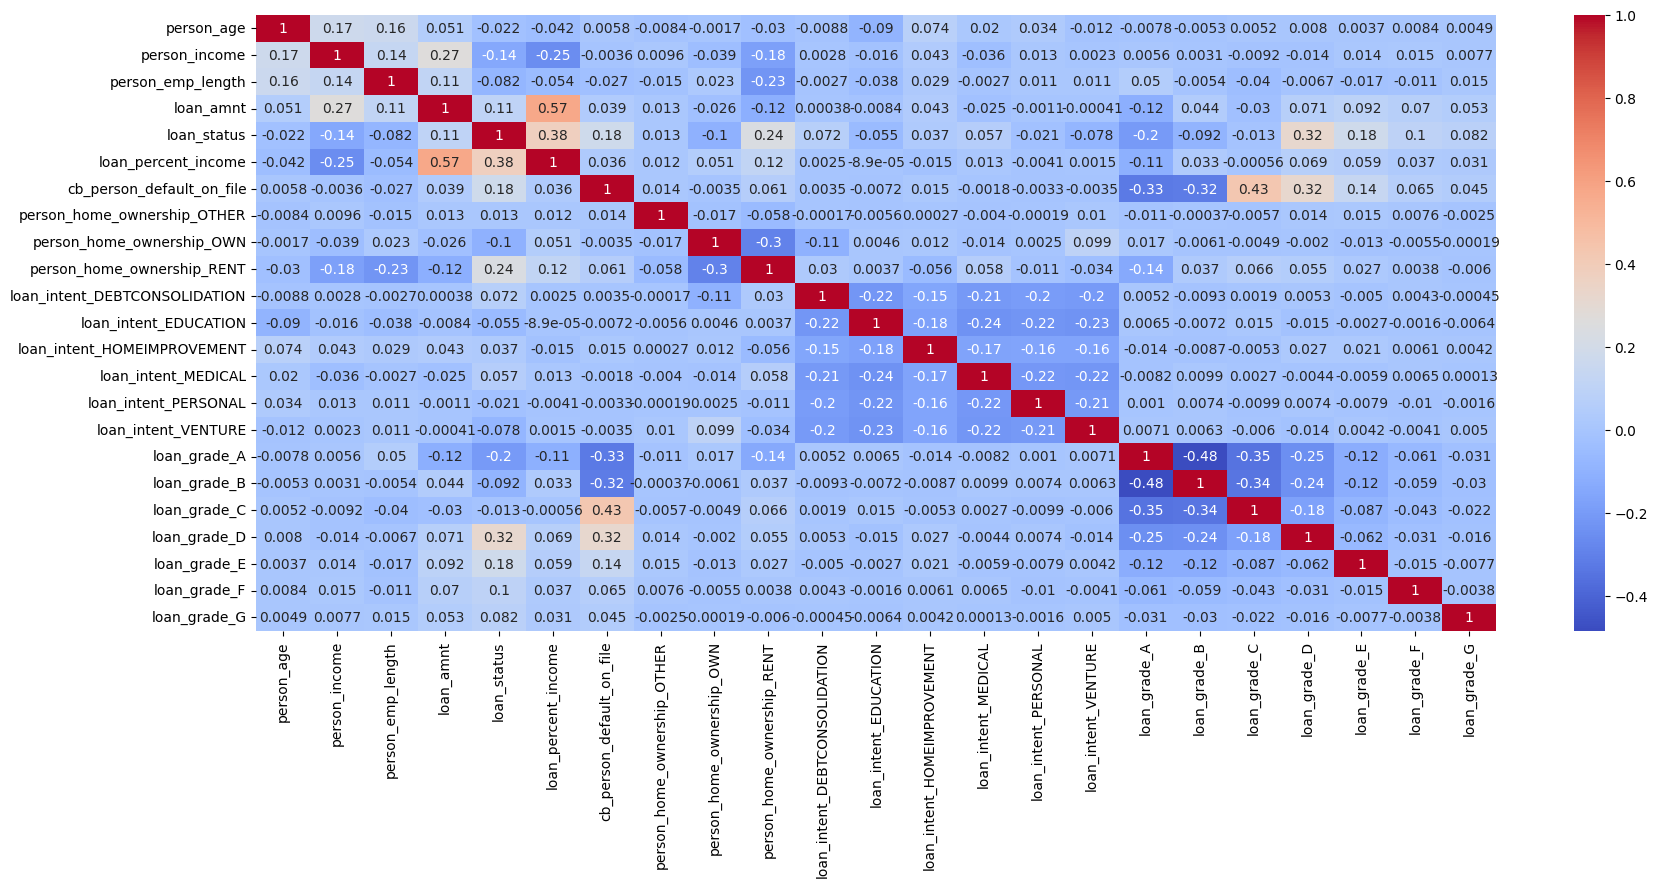

In [175]:
# Correlation matrix
correlation_matrix = df_encoded.corr()

# Set figure size
plt.figure(figsize=(20, 8))  # Increase the width and height (adjust as needed)

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

In [176]:
# from sklearn.preprocessing import LabelEncoder

# # Initialize the label encoder
# le = LabelEncoder()

# # Apply label encoding
# df['gender'] = le.fit_transform(df['gender'])


In [177]:
df_encoded.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_status', 'loan_percent_income', 'cb_person_default_on_file',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G'],
      dtype='object')

In [178]:
# feature splitting

X = df_encoded.drop("loan_status", axis=1)
X.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_percent_income,cb_person_default_on_file,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,22,59000,123.0,35000,0.59,1,False,False,True,False,...,False,True,False,False,False,False,True,False,False,False
1,21,9600,5.0,1000,0.10,0,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2,25,9600,1.0,5500,0.57,0,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
3,23,65500,4.0,35000,0.53,0,False,False,True,False,...,True,False,False,False,False,True,False,False,False,False
4,24,54400,8.0,35000,0.55,1,False,False,True,False,...,True,False,False,False,False,True,False,False,False,False


In [179]:
X.columns
X.shape

(32581, 22)

In [180]:
y = df_encoded['loan_status']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int64

In [181]:
# scale data
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to a DataFrame
X = pd.DataFrame(X_scaled, columns=[col for col in X.columns])
X.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_percent_income,cb_person_default_on_file,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,-0.903374,-0.114143,28.926614,4.019404,3.931411,2.161294,-0.057402,-0.293499,0.990500,-0.436388,...,-0.478548,2.213885,-0.461414,-0.703041,-0.687208,-0.497207,2.825842,-0.174614,-0.086325,-0.044364
1,-1.060904,-0.911147,0.056763,-1.358650,-0.657458,-0.462686,-0.057402,3.407161,-1.009591,-0.436388,...,-0.478548,-0.451695,-0.461414,-0.703041,1.455163,-0.497207,-0.353877,-0.174614,-0.086325,-0.044364
2,-0.430783,-0.911147,-0.921876,-0.646849,3.744110,-0.462686,-0.057402,-0.293499,-1.009591,-0.436388,...,2.089656,-0.451695,-0.461414,-0.703041,-0.687208,2.011234,-0.353877,-0.174614,-0.086325,-0.044364
3,-0.745843,-0.009274,-0.187897,4.019404,3.369508,-0.462686,-0.057402,-0.293499,0.990500,-0.436388,...,2.089656,-0.451695,-0.461414,-0.703041,-0.687208,2.011234,-0.353877,-0.174614,-0.086325,-0.044364
4,-0.588313,-0.188358,0.790742,4.019404,3.556809,2.161294,-0.057402,-0.293499,0.990500,-0.436388,...,2.089656,-0.451695,-0.461414,-0.703041,-0.687208,2.011234,-0.353877,-0.174614,-0.086325,-0.044364


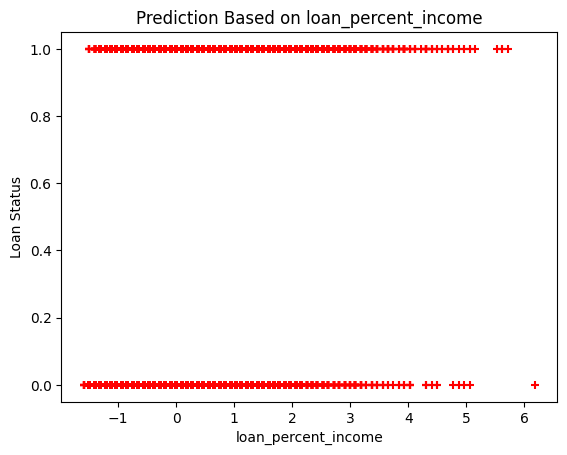

In [182]:
# Scatter plot using 'age' from X and 'dropout' from y
plt.scatter(X['loan_percent_income'], y, marker='+', color='red')
plt.xlabel('loan_percent_income')  # Label for X-axis
plt.ylabel('Loan Status')  # Label for Y-axis
plt.title('Prediction Based on loan_percent_income')
plt.show()


In [183]:
!pip install aif360

<h1>Fairness and Ethical Considerations</h1>

Purpose: To evaluate fairness across demographic subgroups (e.g., renters vs. homeowners).

In [184]:
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric

# Convert dataset to AIF360 format
aif_dataset = BinaryLabelDataset(
    df=df_encoded,
    label_names=["loan_status"],
    protected_attribute_names=["person_home_ownership_RENT", "person_home_ownership_OWN"]
)

# Define privileged and unprivileged groups
privileged_groups = [{"person_home_ownership_RENT": 0, "person_home_ownership_OWN": 1}]  # Homeowners
unprivileged_groups = [{"person_home_ownership_RENT": 1, "person_home_ownership_OWN": 0}]  # Renters

# Compute fairness metrics
metric = BinaryLabelDatasetMetric(
    aif_dataset,
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups
)

# Print fairness metrics
print(f"Disparate Impact: {metric.disparate_impact()}")
print(f"Statistical Parity Difference: {metric.statistical_parity_difference()}")

Disparate Impact: 4.226779556141973
Statistical Parity Difference: 0.24100946375209006


In [185]:
# Train and Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape

(26064, 22)

In [186]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

RandomForestClassifier()

<h1>Reweighting for Fairness</h1>

In [187]:
from aif360.algorithms.preprocessing import Reweighing

# Define privileged and unprivileged groups
privileged_groups = [{"person_home_ownership_RENT": 0, "person_home_ownership_OWN": 1}]  # Homeowners
unprivileged_groups = [{"person_home_ownership_RENT": 1, "person_home_ownership_OWN": 0}]  # Renters

# Apply reweighting
reweighing = Reweighing(unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
dataset_reweighed = reweighing.fit_transform(aif_dataset)

# Train the model on the reweighed dataset
X_reweighed = dataset_reweighed.features
y_reweighed = dataset_reweighed.labels.ravel()

model.fit(X_reweighed, y_reweighed)

# Recompute fairness metrics
metric_reweighed = BinaryLabelDatasetMetric(
    dataset_reweighed,
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups
)

print(f"Disparate Impact (After Reweighing): {metric_reweighed.disparate_impact()}")
print(f"Statistical Parity Difference (After Reweighing): {metric_reweighed.statistical_parity_difference()}")

Disparate Impact (After Reweighing): 1.0000000000000004
Statistical Parity Difference (After Reweighing): 8.326672684688674e-17


<h1 style="color:blue">CHECK OVERFITTING</h1>

In [188]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Compute accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Compute log loss (need probability predictions)
y_train_proba = model.predict_proba(X_train)
y_test_proba = model.predict_proba(X_test)

train_loss = log_loss(y_train, y_train_proba)
test_loss = log_loss(y_test, y_test_proba)

# Print results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Train Loss (Log Loss): {train_loss:.4f}")
print(f"Test Loss (Log Loss): {test_loss:.4f}")


Train Accuracy: 0.9999
Test Accuracy: 0.9323
Train Loss (Log Loss): 0.0516
Test Loss (Log Loss): 0.2797


In [189]:
# Measure accuracy
print(model.score(X_test,y_test))

0.9323308270676691


In [190]:
# prediction
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [191]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_pred,y_test))
print("-----" * 10)
print(confusion_matrix(y_pred,y_test))

0.9323308270676691
--------------------------------------------------
[[5022  391]
 [  50 1054]]


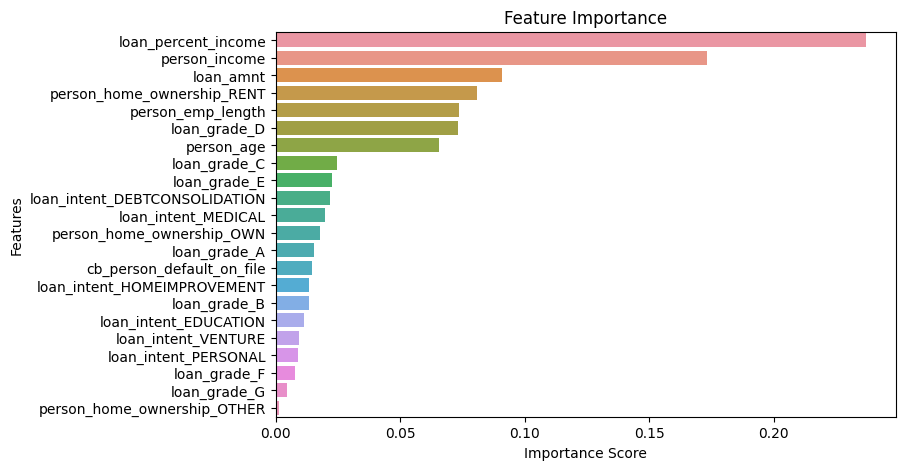

In [192]:
# Extract feature importance
import seaborn as sns
feature_importance = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

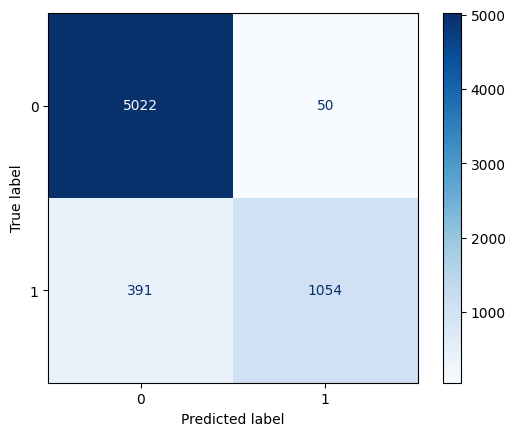

In [193]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()


In [194]:
X_train.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_percent_income', 'cb_person_default_on_file',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G'],
      dtype='object')

In [195]:
print(f"First Independent Record: \n {X_train.iloc[0]}")  # If X_train is a Pandas DataFrame
print(f"First Dependant (loan status) Record: \n {y_train.iloc[0]}")  # If X_train is a Pandas DataFrame


First Independent Record: 
 person_age                       5.712903
person_income                   -0.323881
person_emp_length               -0.677217
loan_amnt                       -0.757573
loan_percent_income             -0.657458
cb_person_default_on_file        2.161294
person_home_ownership_OTHER     -0.057402
person_home_ownership_OWN       -0.293499
person_home_ownership_RENT       0.990500
loan_intent_DEBTCONSOLIDATION   -0.436388
loan_intent_EDUCATION           -0.496967
loan_intent_HOMEIMPROVEMENT     -0.352723
loan_intent_MEDICAL             -0.478548
loan_intent_PERSONAL             2.213885
loan_intent_VENTURE             -0.461414
loan_grade_A                    -0.703041
loan_grade_B                    -0.687208
loan_grade_C                     2.011234
loan_grade_D                    -0.353877
loan_grade_E                    -0.174614
loan_grade_F                    -0.086325
loan_grade_G                    -0.044364
Name: 32377, dtype: float64
First Dependant (loa

In [196]:
# Predict the result for the input value (20 in this case)
# Define the input sample based on the feature list
input_sample = [[64, 46000, 2.0, 4800, 0.1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,0]]

# Predict using the trained model
prediction = model.predict(input_sample)

# Display the result
if prediction[0] == 0:
    print("Loan fully paid (Low Risk): 0")
else:
    print("Loan defaulted (High Risk): 1")
    
# 1 → Loan defaulted (High Risk)
# 0 → Loan fully paid (Low Risk)




Loan fully paid (Low Risk): 0


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [197]:
X.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_percent_income,cb_person_default_on_file,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,-0.903374,-0.114143,28.926614,4.019404,3.931411,2.161294,-0.057402,-0.293499,0.990500,-0.436388,...,-0.478548,2.213885,-0.461414,-0.703041,-0.687208,-0.497207,2.825842,-0.174614,-0.086325,-0.044364
1,-1.060904,-0.911147,0.056763,-1.358650,-0.657458,-0.462686,-0.057402,3.407161,-1.009591,-0.436388,...,-0.478548,-0.451695,-0.461414,-0.703041,1.455163,-0.497207,-0.353877,-0.174614,-0.086325,-0.044364
2,-0.430783,-0.911147,-0.921876,-0.646849,3.744110,-0.462686,-0.057402,-0.293499,-1.009591,-0.436388,...,2.089656,-0.451695,-0.461414,-0.703041,-0.687208,2.011234,-0.353877,-0.174614,-0.086325,-0.044364
3,-0.745843,-0.009274,-0.187897,4.019404,3.369508,-0.462686,-0.057402,-0.293499,0.990500,-0.436388,...,2.089656,-0.451695,-0.461414,-0.703041,-0.687208,2.011234,-0.353877,-0.174614,-0.086325,-0.044364
4,-0.588313,-0.188358,0.790742,4.019404,3.556809,2.161294,-0.057402,-0.293499,0.990500,-0.436388,...,2.089656,-0.451695,-0.461414,-0.703041,-0.687208,2.011234,-0.353877,-0.174614,-0.086325,-0.044364


<h1>END </h1>

<h1>REMOVE OVERFITTING and Retrain Different Models</h1>

In [198]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import GridSearchCV

# Define the model with regularization
model_Random_Forest = RandomForestClassifier(
    n_estimators=100,        # Number of trees (can reduce if needed)
    max_depth=10,            # Limit tree depth to prevent overfitting
    min_samples_split=10,    # Minimum samples to split a node
    min_samples_leaf=5,      # Minimum samples per leaf to prevent small splits
    max_features="sqrt",     # Use sqrt features per split (reduces overfitting)
    random_state=42,
    n_jobs=-1                # Use all CPU cores for faster training
)

# Train the model
model_Random_Forest.fit(X_train, y_train)

# Predict probabilities for loss calculation
train_probs = model_Random_Forest.predict_proba(X_train)
test_probs = model_Random_Forest.predict_proba(X_test)

# Compute Log Loss (Cross-Entropy Loss)
train_loss = log_loss(y_train, train_probs)
test_loss = log_loss(y_test, test_probs)

# Compute Accuracy
train_accuracy = accuracy_score(y_train, model_Random_Forest.predict(X_train))
test_accuracy = accuracy_score(y_test, model_Random_Forest.predict(X_test))

# Print results
print(f"Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")
print(f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")


Train Loss: 0.2328, Test Loss: 0.2493
Train Accuracy: 0.9337, Test Accuracy: 0.9290


In [199]:
# Measure accuracy
print(model_Random_Forest.score(X_test,y_test))

0.9289550406628817


In [200]:
# prediction
y_pred = model_Random_Forest.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [201]:
# Predict the result for the input value (20 in this case)
# Define the input sample based on the feature list
input_sample = [[64, 46000, 2.0, 4800, 0.1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,0]]

# Predict using the trained model
prediction = model_Random_Forest.predict(input_sample)

# Display the result
if prediction[0] == 0:
    print("Loan fully paid (Low Risk): 0")
else:
    print("Loan defaulted (High Risk): 1")
    
# 1 → Loan defaulted (High Risk)
# 0 → Loan fully paid (Low Risk)

Loan fully paid (Low Risk): 0


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [202]:
import pickle

# Saving the model to a file
with open('credit_random_model.pkl', 'wb') as model_file:
    pickle.dump(model_Random_Forest, model_file)
print("Model saved successfully!")

Model saved successfully!


In [203]:
X_train.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_percent_income', 'cb_person_default_on_file',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G'],
      dtype='object')

In [204]:
X_test.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_percent_income,cb_person_default_on_file,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
14668,-0.588313,-0.614287,0.301422,0.064952,1.777452,-0.462686,-0.057402,3.407161,-1.009591,-0.436388,...,-0.478548,-0.451695,-0.461414,-0.703041,1.455163,-0.497207,-0.353877,-0.174614,-0.086325,-0.044364
24614,-0.115722,-0.033475,-1.166536,0.064952,-0.095556,2.161294,-0.057402,-0.293499,0.990500,-0.436388,...,-0.478548,2.213885,-0.461414,-0.703041,-0.687208,2.011234,-0.353877,-0.174614,-0.086325,-0.044364
11096,-0.273252,0.095594,1.280061,1.014021,0.466346,-0.462686,-0.057402,-0.293499,-1.009591,-0.436388,...,-0.478548,-0.451695,-0.461414,-0.703041,-0.687208,-0.497207,2.825842,-0.174614,-0.086325,-0.044364
10424,-0.745843,-0.614352,0.546082,0.064952,1.777452,-0.462686,-0.057402,-0.293499,0.990500,2.291539,...,-0.478548,-0.451695,-0.461414,1.422391,-0.687208,-0.497207,-0.353877,-0.174614,-0.086325,-0.044364
26007,0.356869,-0.348082,-0.677217,0.539487,1.121899,-0.462686,-0.057402,-0.293499,0.990500,-0.436388,...,2.089656,-0.451695,-0.461414,-0.703041,-0.687208,-0.497207,-0.353877,5.726929,-0.086325,-0.044364


<p style="color:blue">Below is the Python code to train and evaluate multiple models (Logistic Regression, Random Forest, Naive Bayes, SVM, XGBoost, LightGBM, and CatBoost) in a loop. The code calculates and prints the accuracy and log loss for both the training and test sets for each model.</p>

<h1 style="color:blue">Different Model Training: Logistic Regression, Random Forest, Naive Bayes, SVM,XGBClassifier,
LGBMClassifier, CatBoostClassifier</h1>

In [205]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import log_loss, accuracy_score, classification_report
import pandas as pd

# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=10,
        min_samples_leaf=5,
        max_features="sqrt",
        random_state=42,
        n_jobs=-1
    ),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True, random_state=42),  # Enable probability for log loss
    "XGBoost": XGBClassifier(random_state=42, n_jobs=-1),
    "LightGBM": LGBMClassifier(random_state=42, n_jobs=-1),
    "CatBoost": CatBoostClassifier(random_state=42, verbose=0)  # Disable training logs
}

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"\n Training {name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Predict probabilities for log loss
    train_probs = model.predict_proba(X_train)
    test_probs = model.predict_proba(X_test)

    # Compute log loss
    train_loss = log_loss(y_train, train_probs)
    test_loss = log_loss(y_test, test_probs)

    # Compute accuracy
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    # Compute classification report
    class_report = classification_report(y_test, model.predict(X_test), output_dict=True)

    # Store results
    results[name] = {
        "Train Loss": train_loss,
        "Test Loss": test_loss,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Precision": class_report["weighted avg"]["precision"],
        "Recall": class_report["weighted avg"]["recall"],
        "F1-Score": class_report["weighted avg"]["f1-score"]
    }

    # Print results
    print(f"  {name} Results:")
    print(f"  Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")
    print(f"  Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
    print(f"  Precision: {results[name]['Precision']:.4f}, Recall: {results[name]['Recall']:.4f}, F1-Score: {results[name]['F1-Score']:.4f}")
    print("-" * 50)

# Display results in a table
results_df = pd.DataFrame(results).T
print("\n Summary of Results:")
print(results_df)



 Training Logistic Regression...
  Logistic Regression Results:
  Train Loss: 0.3381, Test Loss: 0.3464
  Train Accuracy: 0.8691, Test Accuracy: 0.8611
  Precision: 0.8537, Recall: 0.8611, F1-Score: 0.8522
--------------------------------------------------

 Training Random Forest...
  Random Forest Results:
  Train Loss: 0.2328, Test Loss: 0.2493
  Train Accuracy: 0.9337, Test Accuracy: 0.9290
  Precision: 0.9322, Recall: 0.9290, F1-Score: 0.9245
--------------------------------------------------

 Training Naive Bayes...
  Naive Bayes Results:
  Train Loss: 1.1585, Test Loss: 1.1830
  Train Accuracy: 0.8365, Test Accuracy: 0.8347
  Precision: 0.8221, Recall: 0.8347, F1-Score: 0.8207
--------------------------------------------------

 Training SVM...
  SVM Results:
  Train Loss: 0.2472, Test Loss: 0.2708
  Train Accuracy: 0.9176, Test Accuracy: 0.9089
  Precision: 0.9095, Recall: 0.9089, F1-Score: 0.9028
--------------------------------------------------

 Training XGBoost...
  XGBo

<h1>Explainability (SHAP and LIME)</h1>

Purpose: To explain model predictions and interpret feature importance.

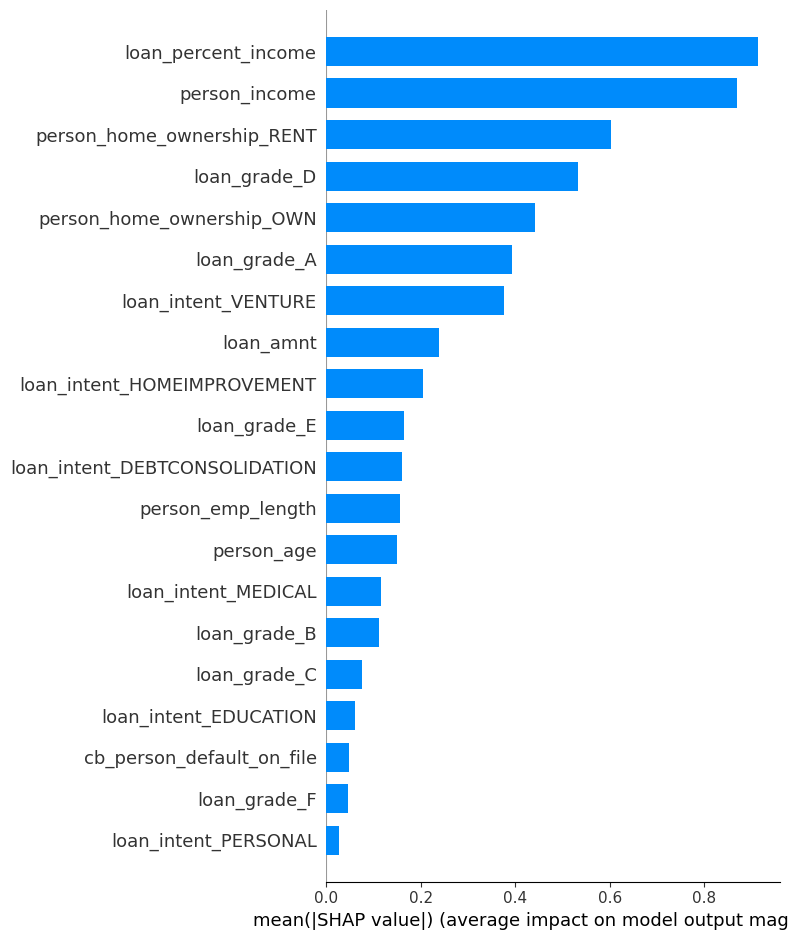

In [206]:
# Add SHAP and LIME code here
import shap
from lime import lime_tabular

# SHAP for CatBoost (best-performing model)
explainer_shap = shap.TreeExplainer(models["CatBoost"])
shap_values = explainer_shap.shap_values(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test, plot_type="bar")



<h1> LIME for CatBoost</h1>

In [210]:
# LIME for CatBoost
explainer_lime = lime_tabular.LimeTabularExplainer(
    X_train.values, 
    feature_names=X_train.columns, 
    class_names=["Fully Paid", "Defaulted"], 
    mode="classification"
)

# Explain a single instance
instance = X_test.iloc[0].values
lime_exp = explainer_lime.explain_instance(instance, models["CatBoost"].predict_proba, num_features=10)
lime_exp.show_in_notebook()

<h1>Security Considerations (Adversarial Robustness)</h1>

Purpose: To evaluate model robustness against adversarial attacks.

In [212]:
# import numpy as np

# Define FGSM attack
def fgsm_attack(model, X, y, epsilon=0.1):
    """
    Perform FGSM adversarial attack on a model.

    Args:
        model: Trained model (must support predict_proba).
        X: Input data (NumPy array or DataFrame).
        y: True labels (NumPy array or Series).
        epsilon: Strength of the attack.

    Returns:
        X_adv: Adversarial examples.
    """
    X = X.values if isinstance(X, pd.DataFrame) else X  # Ensure X is a NumPy array
    y = y.values if isinstance(y, pd.Series) else y  # Ensure y is a NumPy array

    # Compute gradients (approximate using finite differences)
    delta = np.zeros_like(X)
    for i in range(X.shape[1]):
        X_perturbed = X.copy()
        X_perturbed[:, i] += 1e-5  # Small perturbation
        y_pred_perturbed = model.predict_proba(X_perturbed)[:, 1]
        y_pred_original = model.predict_proba(X)[:, 1]
        delta[:, i] = (y_pred_perturbed - y_pred_original) / 1e-5  # Gradient approximation

    # Generate adversarial examples
    X_adv = X + epsilon * np.sign(delta)
    return X_adv

# Apply FGSM attack
X_test_adv = fgsm_attack(models["CatBoost"], X_test, y_test, epsilon=0.1)

# Evaluate robustness
adv_predictions = models["CatBoost"].predict(X_test_adv)
adv_accuracy = accuracy_score(y_test, adv_predictions)
print(f"Accuracy under adversarial attack: {adv_accuracy:.4f}")

Accuracy under adversarial attack: 0.9362


In [214]:
import numpy as np
from sklearn.metrics import accuracy_score

def pgd_attack(model, X, y, epsilon=2.0, alpha=0.1, num_iter=10):
    """
    Perform Projected Gradient Descent (PGD) adversarial attack on a model.

    Args:
        model: Trained model (must support predict_proba).
        X: Input data (NumPy array or DataFrame).
        y: True labels (NumPy array or Series).
        epsilon: Maximum perturbation (controls the strength of the attack).
        alpha: Step size for each iteration (controls the size of each update).
        num_iter: Number of iterations (controls the number of updates).

    Returns:
        X_adv: Adversarial examples (perturbed input data).
    """
    # Ensure X and y are NumPy arrays
    X = X.values if isinstance(X, pd.DataFrame) else X
    y = y.values if isinstance(y, pd.Series) else y

    # Initialize adversarial examples
    X_adv = X.copy()

    # Perform PGD iterations
    for _ in range(num_iter):
        # Compute gradients using finite differences
        delta = np.zeros_like(X_adv)
        for i in range(X_adv.shape[1]):
            # Perturb the i-th feature
            X_perturbed = X_adv.copy()
            X_perturbed[:, i] += 1e-2  # Small perturbation to approximate gradient
            y_pred_perturbed = model.predict_proba(X_perturbed)[:, 1]  # Predict probabilities
            y_pred_original = model.predict_proba(X_adv)[:, 1]  # Original predictions
            delta[:, i] = (y_pred_perturbed - y_pred_original) / 1e-2  # Approximate gradient

        # Update adversarial examples
        X_adv = X_adv + alpha * np.sign(delta)  # Move in the direction of the gradient
        X_adv = np.clip(X_adv, X - epsilon, X + epsilon)  # Project back to the epsilon-ball
        X_adv = np.clip(X_adv, 0, 1)  # Ensure values stay within valid range (e.g., [0, 1])

    return X_adv

# Apply PGD attack
X_test_adv = pgd_attack(models["CatBoost"], X_test, y_test, epsilon=2.0, alpha=0.1, num_iter=10)
adv_predictions = models["CatBoost"].predict(X_test_adv)
adv_accuracy = accuracy_score(y_test, adv_predictions)
print(f"Accuracy under PGD attack: {adv_accuracy:.4f}")

# Try a larger epsilon for FGSM attack
epsilon = 2.0  # Increase epsilon for stronger attack
X_test_adv_fgsm = fgsm_attack(models["CatBoost"], X_test, y_test, epsilon=epsilon)
adv_predictions_fgsm = models["CatBoost"].predict(X_test_adv_fgsm)
adv_accuracy_fgsm = accuracy_score(y_test, adv_predictions_fgsm)
print(f"Accuracy under FGSM attack (epsilon={epsilon}): {adv_accuracy_fgsm:.4f}")

Accuracy under PGD attack: 0.7783
Accuracy under FGSM attack (epsilon=2.0): 0.9328


In [215]:
import numpy as np

# Define FGSM attack
def fgsm_attack(model, X, y, epsilon=0.1):
    """
    Perform FGSM adversarial attack on a model.
    
    Args:
        model: Trained model (must support predict_proba).
        X: Input data (NumPy array or DataFrame).
        y: True labels (NumPy array or Series).
        epsilon: Strength of the attack.
    
    Returns:
        X_adv: Adversarial examples.
    """
    X = X.values if isinstance(X, pd.DataFrame) else X  # Ensure X is a NumPy array
    y = y.values if isinstance(y, pd.Series) else y  # Ensure y is a NumPy array

    # Compute gradients (approximate using finite differences)
    delta = np.zeros_like(X)
    for i in range(X.shape[1]):
        X_perturbed = X.copy()
        X_perturbed[:, i] += 1e-5  # Small perturbation
        y_pred_perturbed = model.predict_proba(X_perturbed)[:, 1]
        y_pred_original = model.predict_proba(X)[:, 1]
        delta[:, i] = (y_pred_perturbed - y_pred_original) / 1e-5  # Gradient approximation

    # Generate adversarial examples
    X_adv = X + epsilon * np.sign(delta)
    return X_adv

# Apply FGSM attack
X_test_adv = fgsm_attack(models["CatBoost"], X_test, y_test, epsilon=0.1)

# Evaluate robustness
adv_predictions = models["CatBoost"].predict(X_test_adv)
adv_accuracy = accuracy_score(y_test, adv_predictions)
print(f"Accuracy under adversarial attack: {adv_accuracy:.4f}")

Accuracy under adversarial attack: 0.9362


<h1 style="color:blue">Prediction for each Model</h1>

In [216]:
# prediction
# Make predictions with each model
y_preds = {}
for name, model in models.items():
    y_preds[name] = model.predict(X_test)

# Print the predictions for each model
for name, y_pred in y_preds.items():
    print(f"\nPredictions for {name}:")
    print(y_pred)



Predictions for Logistic Regression:
[0 0 0 ... 0 0 0]

Predictions for Random Forest:
[0 0 0 ... 0 0 0]

Predictions for Naive Bayes:
[0 0 0 ... 0 0 0]

Predictions for SVM:
[0 0 0 ... 0 0 0]

Predictions for XGBoost:
[0 0 0 ... 0 0 0]

Predictions for LightGBM:
[0 0 0 ... 0 0 0]

Predictions for CatBoost:
[0 0 0 ... 0 0 0]


<h1 style="color:blue">Confusion Matrix for each Model</h1>

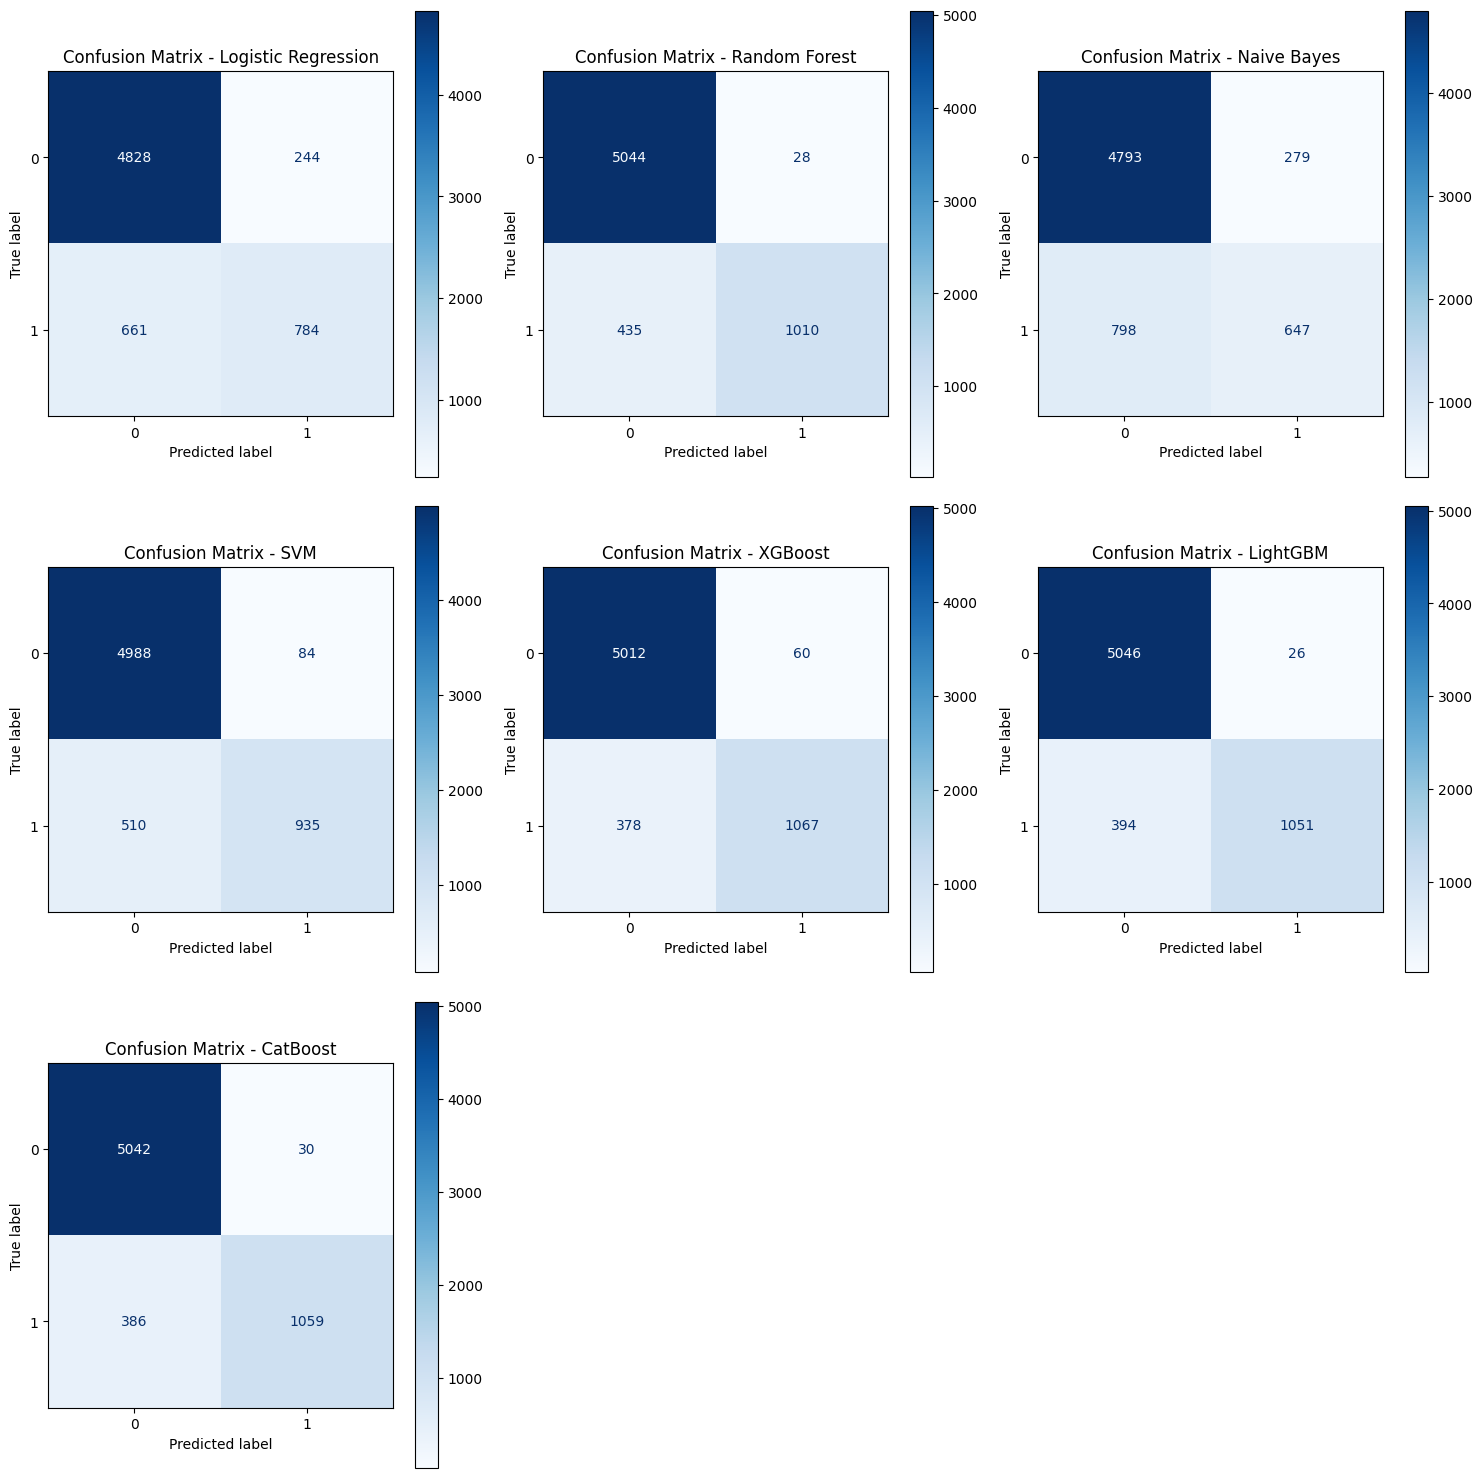

In [218]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Set up the figure and axes for plotting 3 models per row
n_rows = (len(models) + 2) // 3  # Calculate number of rows needed (round up if needed)
fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows * 5))

# Flatten axes array in case it's 2D for easier iteration
axes = axes.flatten()

# Iterate over each model and plot the confusion matrix
for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)  # Get predictions for each model
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues', ax=axes[i])
    axes[i].set_title(f"Confusion Matrix - {name}")
    
# Hide unused axes in the last row if necessary
for i in range(len(models), len(axes)):
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


<h1>Feature Importance Visualization</h1>

Purpose: To visualize feature importance for the best-performing model.

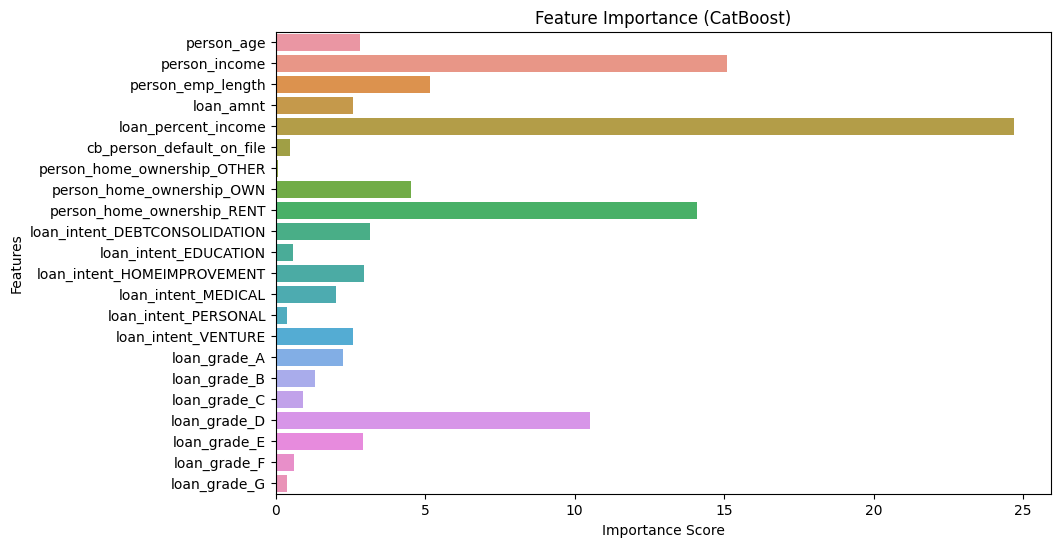

In [219]:
# Add feature importance visualization 
# Feature importance for CatBoost
feature_importance = models["CatBoost"].get_feature_importance()

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=X_train.columns)
plt.title("Feature Importance (CatBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

<h1>SAVE MODEL</h1>

In [220]:
import joblib

# Find the best model based on highest test accuracy
best_model_name = max(results, key=lambda x: results[x]["Test Accuracy"])
best_model = models[best_model_name]

# Save the best model
model_filename = f"best_model_{best_model_name.lower().replace(' ', '_')}.pkl"
joblib.dump(best_model, model_filename)

print(f"Best model ({best_model_name}) saved successfully as {model_filename}!")


Best model (CatBoost) saved successfully as best_model_catboost.pkl!


<h1>Subgroup Analysis</h1>

Purpose: To evaluate model performance across demographic subgroups.

In [221]:

# Subgroup analysis for renters vs. homeowners
subgroups = {
    "Renters": df_encoded[df_encoded["person_home_ownership_RENT"] == 1],
    "Homeowners": df_encoded[df_encoded["person_home_ownership_OWN"] == 1]
}

for subgroup_name, subgroup_data in subgroups.items():
    X_subgroup = subgroup_data.drop("loan_status", axis=1)
    y_subgroup = subgroup_data["loan_status"]
    accuracy = accuracy_score(y_subgroup, best_model.predict(X_subgroup))
    print(f"Accuracy for {subgroup_name}: {accuracy:.4f}")

Accuracy for Renters: 0.6843
Accuracy for Homeowners: 0.9253


In [222]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_pred,y_test))
print("-----" * 10)
print(confusion_matrix(y_pred,y_test))

0.9361669479822003
--------------------------------------------------
[[5042  386]
 [  30 1059]]


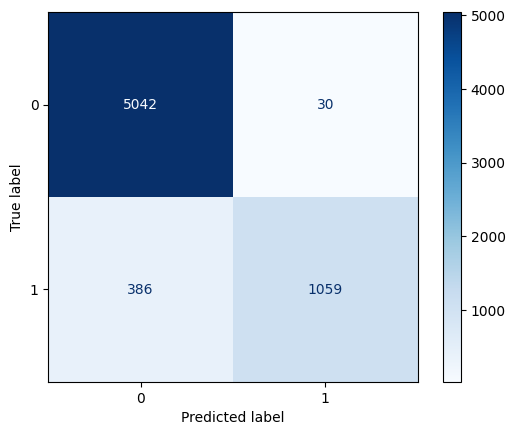

In [224]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()
